In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [141]:
dataset = np.array([
    (-1.1,-2.2), (-0.8,-1.2), (0,-0.5), (0.6, 1.4), (1.2,2.1), (1.7, 3.8), 
])

In [162]:
basis = np.array([[1, 2]]).T
basis = basis/np.linalg.norm(basis)
z = dataset @ basis
reconstruction = z @ basis.T

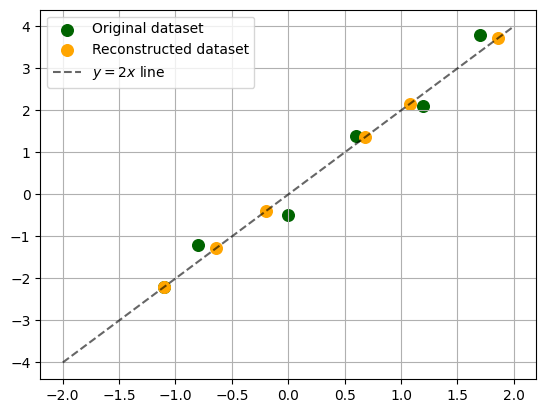

In [165]:
plt.scatter(dataset[:,0],dataset[:,1], c='darkgreen', s=70, label='Original dataset')
plt.scatter(reconstruction[:,0],reconstruction[:,1], c='orange', s=70, label='Reconstructed dataset')
axis = plt.axis()
plt.plot((-2, 2), (-4, 4), linestyle='--', color='black', alpha=0.6, label='$y=2x$ line')
plt.grid()
plt.legend()
plt.show()

# Figure 2

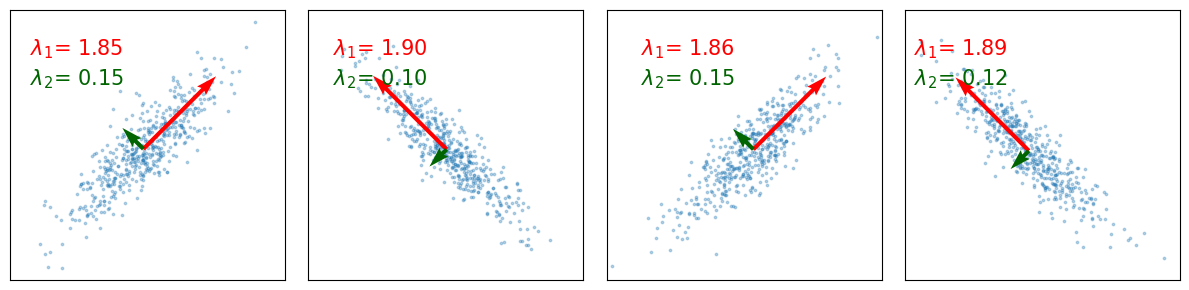

In [139]:
import numpy as np
import matplotlib.pyplot as plt

# Generate the initial data
angles = [-20, -80, 20, 80]

fig, axes = plt.subplots(1, 4, figsize=(12, 3), sharey=True)

for i, angle in enumerate(angles):
    theta = np.radians(angle)
    X = np.random.multivariate_normal([0, 0], [[1, 0.9], [0.9, 1]], 500)
    rotation_matrix = np.array([[np.cos(theta), -np.sin(theta)],
                                [np.sin(theta), np.cos(theta)]])
    X_rotated = X*np.random.randn() @ rotation_matrix

    # Standardize the rotated data
    X_mean_rotated = np.mean(X_rotated, axis=0)
    X_std_rotated = np.std(X_rotated, axis=0)
    B_rotated = (X_rotated - X_mean_rotated) / X_std_rotated

    # Perform PCA on the rotated data
    C_rotated = B_rotated.T @ B_rotated / (len(B_rotated) - 1)
    eigenvalues_rotated, eigenvectors_rotated = np.linalg.eigh(C_rotated)
    sorted_indices = np.argsort(eigenvalues_rotated)[::-1]
    eigenvalues_rotated = eigenvalues_rotated[sorted_indices]
    eigenvectors_rotated = eigenvectors_rotated[:, sorted_indices]

    # Plot the data
    axes[i].scatter(B_rotated[:, 0], B_rotated[:, 1], s=3, alpha=0.3)
    for j, color in enumerate(['red', 'darkgreen']):  # Plot only the first k principal components
        end_point = eigenvectors_rotated[:, j] * np.sqrt(eigenvalues_rotated[j]) * 4  # Adjusted scaling factor
        axes[i].quiver(X_mean_rotated[0], X_mean_rotated[1], end_point[0], end_point[1], color=color, scale=2, width=0.015, angles='xy', scale_units='xy')
    axes[i].text(-3, 2.5, f'$\lambda_1$= {eigenvalues_rotated[0]:.2f}', {'color': 'red', 'fontsize': 15})
    axes[i].text(-3, 1.7, f'$\lambda_2$= {eigenvalues_rotated[1]:.2f}', {'color': 'darkgreen', 'fontsize': 15})
    axes[i].axis('equal')
    axes[i].axis()
    axes[i].set_xticks([])
    axes[i].set_yticks([])
plt.tight_layout()
plt.show()

In [ ]:
N = len(X)
k = 1 # number of principal components to keep

# 1) learn the principal components.
X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)
B = (X - X_mean) / X_std
C = B.T@B / (N-1)
eigenvalues, eigenvectors = np.linalg.eigh(C)
# sort the eigenvectors by eigenvalues
sorted_indices = np.argsort(eigenvalues)[::-1]
all_principal_components = eigenvectors[:, sorted_indices]
# keep only first k principal components
principal_components = all_principal_components[:, :k]

# 2) Transform into new basis.
B_test = (X - X_mean) / X_std
z = B_test @ principal_components # latent representation $z$

# 3) Reconstructing X_new back from the new basis.
B_recon = z @ principal_components.T
X_recon = B_recon * X_std + X_mean

# Figure 2

In [ ]:
dataset = np.array([
    (-1.1,-2.2), (-0.8,-1.2), (0,-0.5), (0.6, 1.4), (1.2,2.1), (1.7, 3.8), 
])

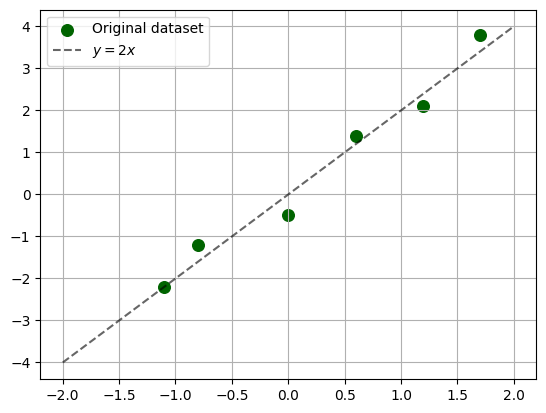

In [ ]:
plt.scatter(dataset[:,0],dataset[:,1], c='darkgreen', s=70, label='Original dataset')
axis = plt.axis()
plt.plot((-2, 2), (-4, 4), linestyle='--', color='black', alpha=0.6, label='$y=2x$')
# plt.axis('equal')
plt.grid()
plt.legend()
plt.show()

In [ ]:
X = dataset

k = 1 # number of principal components
X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)

X_mean, X_std

(array([0.26666667, 0.56666667]), array([1.00940026, 2.05804654]))

In [ ]:
N = len(X)
k = 1 # number of principal components to keep

# 1) learn the principal components.
X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)
B = (X - X_mean) / X_std
C = B.T@B / (N-1)
eigenvalues, eigenvectors = np.linalg.eigh(C)
# sort the eigenvectors by eigenvalues
sorted_indices = np.argsort(eigenvalues)[::-1]
all_principal_components = eigenvectors[:, sorted_indices]
# keep only first k principal components
principal_components = all_principal_components[:, :k]

# 2) Transform into new basis.
B_test = (X - X_mean) / X_std
z = B_test @ principal_components # latent representation $z$

# 3) Reconstructing X_new back from the new basis.
B_recon = z @ principal_components.T
X_recon = B_recon * X_std + X_mean

In [ ]:
pc1 = principal_components[:, 0]
pc1 * X_std + X_mean

array([0.98042044, 2.02192533])

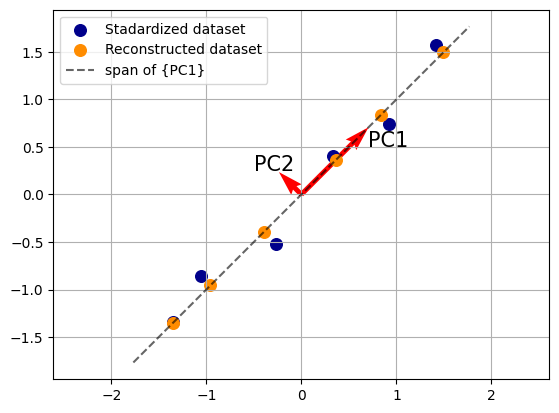

In [ ]:
# Plotting principal component vectors
# # PC1
pc1 = all_principal_components[:, 0]
plt.quiver(0, 0, pc1[0], pc1[1], angles='xy', scale_units='xy', scale=1, color='r', width=0.01)
plt.text(0.7, 0.5, f'PC1', color='black', fontdict={'fontsize': 15}) 
# # PC2
pc2 = all_principal_components[:, 1]
plt.quiver(0, 0, pc2[0], pc2[1], angles='xy', scale_units='xy', scale=3, color='r', width=0.01)
plt.text(-0.5, 0.25, f'PC2', color='black', fontdict={'fontsize': 15}) 

# Plotting original data and reconstructed data.
plt.scatter(B[:, 0], B[:, 1], marker='o', c='darkblue', s=70, label='Stadardized dataset')
plt.scatter(B_recon[:, 0], B_recon[:, 1], marker='o', c='darkorange', s=70, label='Reconstructed dataset')

t = np.linspace(-2.5, 2.5, 2)
x = t[:, None] * pc1
plt.plot(x[:, 0], x[:, 1], linestyle='--', color='black', alpha=0.6, label='span of {PC1}')

# Configure
plt.axis('equal')
plt.grid()
plt.legend()
plt.show()

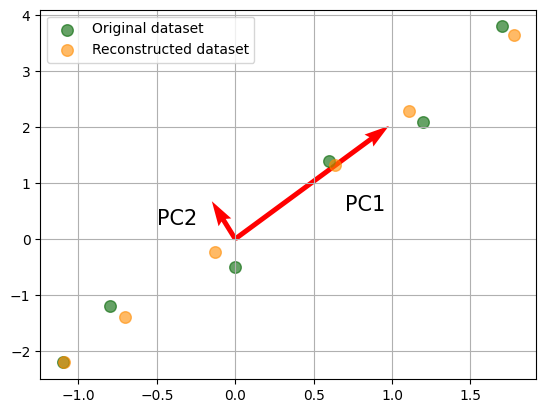

In [ ]:
# Plotting principal component vectors
# # PC1
pc1 = all_principal_components[:, 0]*X_std+X_mean
plt.quiver(0, 0, pc1[0], pc1[1], angles='xy', scale_units='xy', scale=1, color='r', width=0.01)
plt.text(0.7, 0.5, f'PC1', color='black', fontdict={'fontsize': 15}) 
# # PC2
pc2 = all_principal_components[:, 1]*X_std+X_mean
plt.quiver(0, 0, pc2[0], pc2[1], angles='xy', scale_units='xy', scale=3, color='r', width=0.01)
plt.text(-0.5, 0.25, f'PC2', color='black', fontdict={'fontsize': 15}) 

# Plotting original data and reconstructed data.
plt.scatter(X[:, 0], X[:, 1], marker='o', c='darkgreen', s=70, label='Original dataset', alpha=0.6)
plt.scatter(X_recon[:, 0], X_recon[:, 1], marker='o', c='darkorange', s=70, label='Reconstructed dataset', alpha=0.6)

# plt.plot((2, -2), (4, -4), linestyle='--', color='black', alpha=0.6, label='$y=2x$')

# Configure
# plt.axis('equal')
plt.grid()
plt.legend()
plt.show()